# IBM Capstone Project

## Predicting oil prices


In this project are analyzed two different sources of data, the [British Petroleum annual report](https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy/downloads.html) and the [FRED oil prices historical data](https://fred.stlouisfed.org/series/DCOILWTICO). From the BP annual report are used the historical data for the production and consumption of oil for different countries and the annually reported prices for the barrel of oil, while from the FRED dataset is used the oil prices history based on the Brent indicator, which are reported daily.

The goal of this project is to use the BP historical data related to oil production and consumption to find periods when the oil industry has had specific behaviours. This, to use the period composed by the most recent years to forecast future oil prices, using the FRED oil prices historical data for the training of an RNN model.


## Table of Content:

* [Introduction](#another_cell_0)

* [Data Extraction, Transformation and Loading](#another_cell)

* [Clustering of oil production and consumption features by years](#another_cell_two)

* [Correlation among clusters and oil prices](#another_cell_three)

* [Forecasting oil prices](#another_cell_fourth)

* [Conclusion](#another_cell_fifth)

* [Future work](#another_cell_last)



<a id='another_cell_0'></a>
## Introduction

The oil industry has shown through the time that it has up and downs, related to different factors such as the amount of oil produced and consumed, among others. One of the best indicators of the oil industry is how much a barrel of oil cost. A higher price means that there is a lot of demand, as result countries that produce oil try to produce more to take advantage of that price. One the other hand, a lower price means that it exists too much production of oil for the demand required, meaning that the cost of the barrel of oil drops. This is relevant because it shows how related are these features. Nonetheless, if these features are analyzed in more detail it can be observed that it has been periods when the industry has had different tendencies. For example, a remarkable tendency to reduce the production the oil in response to a decrease in the price of the oil and, therefore, a decrease in the consumption. Similar events are observable through time.

<a id='another_cell'></a>
## Data Extraction, Transformation and Loading

This section is used to load the data obtained from the mentioned sources, to remove undefined and unnecessary values and to create pandas dataframes with the desired structure. The first part of this section consists of loading the data, while the rest of the section is about removing undefined values and features with small variance. Additionally, the values of some features are corrected, such as dates timestamps with different formats and countries with names that are not represented the same in all dataframes.

### Importing required libraries

In [2]:
#Importing libraries to manage datafiles
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from FunctionsETL import CleaningProdConsump, CleaningPrice, CleanPriceBrent, NaNValuesDistribution

### Loading data

In [3]:
#Loading data from BP
filename = 'bp-stats-review-2019-all-data.xlsx'
filename2 = 'DCOILBRENTEU.csv'
path = os.path.join(os.getcwd(), 'Data', filename)
path2 = os.path.join(os.getcwd(), 'Data', filename2)
#Loading data from FRED
dfProd = pd.read_excel(path, sheet_name = 'Oil Production - Barrels')
dfCons = pd.read_excel(path, sheet_name = 'Oil Consumption - Barrels')
dfPrice = pd.read_excel(path, sheet_name = 'Oil - Crude prices since 1861')
dfPriceLong = pd.read_csv(path2)

### Processing the loaded data

In this part are removing unnecessary features, empty elements, corrected dates with different formats and standardize the names of the countries in all dataframes. 

In [4]:
#Cleaning the dataset related with the FRED oil prices history
dfPriceLong = CleanPriceBrent(dfPriceLong)

#Cleaning the dataset related with the BP data
SovUnionPro = ['Azerbaijan', 'Kazakhstan', 'Russian Federation', 'Turkmenistan', 'USSR', 'Uzbekistan','Other CIS', 'Total CIS']
SovUnionCon = ['Azerbaijan', 'Belarus', 'Kazakhstan', 'Russian Federation', 'Turkmenistan', 'USSR', 'Uzbekistan', 'Other CIS', 'Total CIS']

dfProd = CleaningProdConsump(dfProd, 'Thousand barrels daily', SpeCols = SovUnionPro)
dfCons = CleaningProdConsump(dfCons, 'Thousand barrels daily', SpeCols = SovUnionCon)
dfPrice = CleaningPrice(dfPrice)

C:\Users\alfde\Anaconda3\envs\DeepLearning\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
#Example of a dataframe generated from the BP data
dfProd.head()

,Algeria,Angola,Argentina,Australia,Azerbaijan,Brazil,Brunei,Canada,Chad,China,...,Trinidad & Tobago,Tunisia,Turkmenistan,US,United Arab Emirates,United Kingdom,Uzbekistan,Venezuela,Vietnam,Yemen
1965,569.943836,13.297397,275.673973,7.0,NaN,96.0,80.0,920.0,NaN,227.129589,...,135.0,NaN,NaN,9014.148,282.2,1.739836,NaN,3503.0,NaN,NaN
1966,733.593151,12.810164,292.864110,9.0,NaN,117.0,96.0,1012.0,NaN,292.195890,...,153.0,16.243808,NaN,9579.241,360.0,1.615562,NaN,3402.0,NaN,NaN
1967,842.664384,10.901836,318.631233,21.0,NaN,147.0,104.0,1106.0,NaN,278.740822,...,179.0,47.214493,NaN,10219.252,382.1,1.843397,NaN,3576.0,NaN,NaN
1968,922.495082,15.184426,348.158470,39.0,NaN,161.0,122.0,1194.0,NaN,320.236885,...,191.0,67.045874,NaN,10599.743,496.6,1.735082,NaN,3639.0,NaN,NaN
1969,969.331507,49.900767,361.532055,45.0,NaN,176.0,124.0,1306.0,NaN,436.586849,...,157.0,78.100904,NaN,10827.674,627.8,1.792110,NaN,3631.0,NaN,NaN


In [6]:
# Example of a dataframe generated from the FRED data
dfPriceLong.head()

,DATE,DCOILBRENTEU
0,1987-05-25,18.60
1,1987-05-26,18.63
2,1987-05-27,18.60
3,1987-05-28,18.60
4,1987-05-29,18.58


### Finding undefined values

In the following figures are presented the number of undefined values remaining on the dataframes generated from the BP data. Dataframes containing oil prices are free of undefined values.

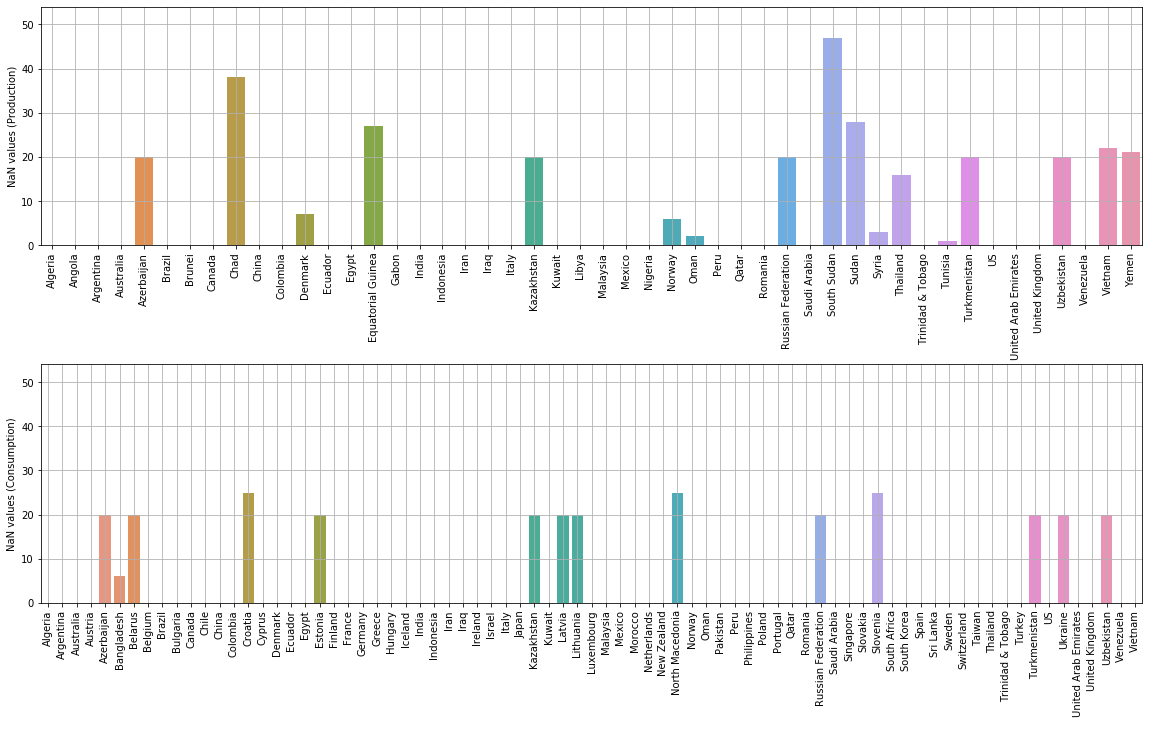

In [7]:
#Undefined values in the dataframe based on the BP oil production and consumptiond ata
NaNValuesDistribution(dfProd, dfCons)

### Removing undefined and unnecessary values

Removing unnecessary data, such features with not enough variance. This is achieved by finding features with less variance and with maximum production or consumption less than the expected values considering all countries analyzed. Furthermore, features containing more nan values than expected are removed and the remaining are replaced with zeros. 

#### Finding unnecessary values in the oil BP oil production dataframe

In [8]:
#Statistics related to the oil production dataframe features
dfProd[dfProd.columns[dfProd.isnull().sum(0) > 10]].describe()

,Azerbaijan,Chad,Equatorial Guinea,Kazakhstan,Russian Federation,South Sudan,Sudan,Thailand,Turkmenistan,Uzbekistan,Vietnam,Yemen
count,34.000000,16.000000,27.000000,34.000000,34.000000,7.000000,26.000000,38.000000,34.000000,34.000000,32.000000,33.000000
mean,495.533196,115.007215,208.092411,1049.123541,9262.590729,113.284100,186.103214,215.033006,168.220526,103.609432,256.551753,262.154594
std,310.513349,35.600531,131.817862,529.960672,1952.665231,41.287683,161.059570,172.734805,55.184899,45.646245,124.817380,141.078495
min,182.306575,23.561644,2.000000,445.853589,6061.591967,31.041000,2.000000,1.600000,83.863014,54.608219,5.676712,10.000000
25%,257.801370,100.761976,91.500000,556.509021,7277.839919,105.465900,70.903887,62.578354,120.333354,64.042699,151.852055,177.844692
50%,303.597466,112.156255,230.000000,917.034123,10010.826591,117.209800,118.728950,155.335206,167.528413,86.473327,316.293231,306.459284
75%,847.516580,131.177296,312.918109,1643.599400,10861.965777,139.227250,291.103518,379.190035,209.199190,147.539957,353.532596,380.091507
max,1036.716877,173.424658,380.180700,1926.957669,11437.802537,155.351600,483.115660,485.577333,261.980572,191.453973,420.402732,456.848181


In [9]:
#Showing the minimum averaged standard deviations and means from the oil production dataset
print('Minimun average std for oil production: ' + str(dfProd.std().mean()), '\n')
print('Minimun average production (MBPD): ' + str(dfProd.min().mean()))

Minimun average std for oil production: 515.2333758146317 

Minimun average production (MBPD): 499.70389020558633


#### Finding unnecessary values in  the oil BP oil consumption dataframe

In [10]:
#Statistics related to the oil consumption dataframe features
dfCons[dfCons.columns[dfCons.isnull().sum(0) > 10]].describe()

,Azerbaijan,Belarus,Croatia,Estonia,Kazakhstan,Latvia,Lithuania,North Macedonia,Russian Federation,Slovenia,Turkmenistan,Ukraine,Uzbekistan
count,34.000000,34.000000,29.000000,34.000000,34.000000,34.000000,34.000000,29.000000,34.000000,29.000000,34.000000,34.000000,34.000000
mean,114.066731,250.455923,79.086306,36.053841,269.461248,43.825371,78.670014,19.278505,3401.873729,50.172544,100.349858,500.094992,134.576203
std,31.647309,151.164747,10.329498,15.298368,92.109215,19.955809,38.779637,1.885147,936.877737,6.994826,28.551269,401.046588,65.641132
min,72.198340,134.798934,63.752630,22.723934,143.875616,26.229847,47.986503,15.577951,2489.813655,33.019246,54.803699,194.275327,48.620464
25%,91.317240,156.272943,69.642630,27.085760,199.823606,33.140193,54.579674,18.537184,2648.637123,49.546109,72.788889,267.535547,78.904603
50%,103.496422,171.305151,79.551448,29.220940,243.873616,35.198393,61.648366,18.903669,3096.547920,52.087718,100.873951,295.481041,134.548548
75%,148.201390,268.161589,88.950110,31.786730,347.404721,42.392501,73.197466,20.555963,3817.765973,54.137819,116.840448,471.296575,170.713388
max,168.140986,580.654274,95.407759,68.125217,444.929768,112.430055,167.167973,24.275277,5111.449288,63.753054,151.230989,1330.157671,278.568962


In [11]:
#Showing the minimum averaged standard deviations and means from the oil consumption dataset
print('Minimun average std for oil consumption: ' + str(dfCons.std().mean()), '\n')
print('Minimun average consumption (MBPD): ' + str(dfCons.min().mean()))

Minimun average std for oil consumption: 289.1010432554995 

Minimun average consumption (MBPD): 382.22663922511225


#### Removing features with more than 10 nan values:

In [36]:
#From the oil production dataset
dfProd.drop(dfProd.columns[dfProd.isnull().sum(0) > 10], axis=1, inplace=True)
dfCons.drop(dfCons.columns[dfCons.isnull().sum(0) > 10], axis=1, inplace=True)

#### Removing unnecessary values:

In [37]:
# From the oil consumption dataset
dfProd.drop(dfProd.columns[dfProd.std() < dfProd.std().mean()], axis=1, inplace=True)
dfCons.drop(dfCons.columns[dfCons.std() < dfCons.std().mean()], axis=1, inplace=True)

#### Replacing the ramaining undefined values:

In [38]:
dfProd.fillna(0, inplace=True)
dfCons.fillna(0, inplace=True)

### Merging dataframes

In this section features found in the oil production and oil consumptions dataframes are merged. This is done to analyze both features to find patterns that could lead to the finding of cycles related to the behaviour of the oil industry. 

In [39]:
#Merging the dataframes
dfProdb = dfProd.copy()
dfConsb = dfCons.copy()
dfProdb.columns = dfProd.columns + '_Prod'
dfConsb.columns = dfCons.columns + '_Cons'
dfTrends = pd.merge(dfProdb, dfConsb, left_index=True, right_index=True)
del [dfProdb, dfConsb]

In [40]:
#Example of the merged dataframe
dfTrends.head()

,Angola_Prod,Brazil_Prod,Canada_Prod,China_Prod,Iran_Prod,Iraq_Prod,Kuwait_Prod,Libya_Prod,Mexico_Prod,Nigeria_Prod,...,Iran_Cons,Japan_Cons,Mexico_Cons,Saudi Arabia_Cons,Singapore_Cons,South Korea_Cons,Spain_Cons,Taiwan_Cons,Thailand_Cons,US_Cons
1965,13.297397,96.0,920.0,227.129589,1908.0,1313.0,2371.0,1220.0,362.0,274.2,...,142.896305,1705.075863,315.871088,389.574466,76.499760,24.946301,268.464164,43.855726,47.561397,11522.187698
1966,12.810164,117.0,1012.0,292.195890,2132.0,1392.0,2505.0,1508.0,370.0,417.6,...,155.998874,1945.191890,333.048484,392.916027,87.407388,37.367973,318.838658,51.777699,55.992795,12100.347314
1967,10.901836,147.0,1106.0,278.740822,2603.0,1228.0,2522.0,1733.0,411.0,319.1,...,172.290812,2388.409726,357.305957,396.259562,104.373770,64.730603,387.671890,61.370959,61.973425,12566.880466
1968,15.184426,161.0,1194.0,320.236885,2840.0,1503.0,2656.0,2599.0,439.0,141.3,...,189.269620,2765.207568,386.144762,398.552514,128.877528,95.415683,411.124126,72.863716,81.130000,13404.548552
1969,49.900767,176.0,1306.0,436.586849,3376.0,1521.0,2819.0,3108.0,461.0,540.3,...,207.363143,3284.039397,410.021906,403.065123,127.076531,129.793178,469.013918,87.341151,87.969644,14152.985096


<a id='another_cell_two'></a>
## Clustering oil production and consumption features by years

In this section, PCA is used to reduce the dimensionality of the merged dataframe features. This, to apply K-means on the reduced dimensions to cluster the continuous sequence of years, which can help to find specific cycles in the oil industry. This part is important for the implementation of this project since it will help to define the range of dates to use for the forecasting of oil prices, because future prices will be more related with the cluster containing the most recent sequence of years, assuming it the same behaviour continues from that cluster.  

### Importing Libraries

In [14]:
#Importing related libraries
from sklearn.cluster import KMeans
from FunctionsClustering import DimensionReduction, KmeanProportion
import keras

Using TensorFlow backend.


### Number of PCA components to use for and groups for the clustering

The number of PCA components to use is related to the total amount of variance related to them. In the figure below, it can be observed that using only the first 8 components it is possible to maintain most of the variance associated with them, and then, to keep most of the information from the features of the dataframe. Therefore, the first 8 components are used for the clustering of the features. Moreover, the number of clusters to group the features is selected based on the elbow method, as can be observed at the bottom of the figure below.

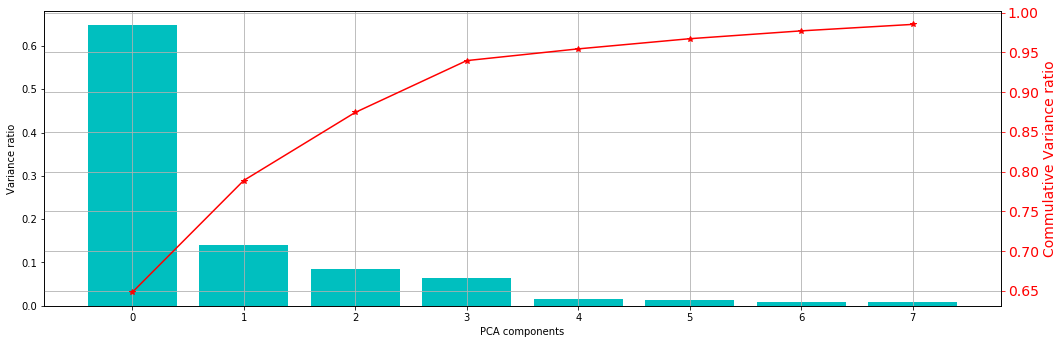

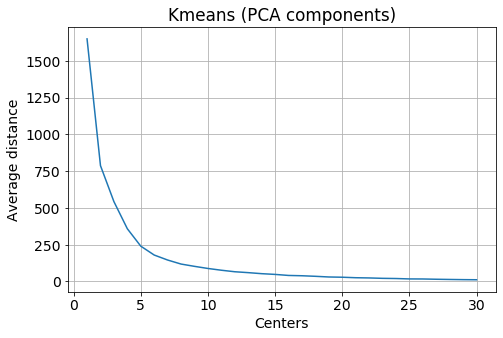

In [15]:
dfPCA = DimensionReduction(dfTrends, components=8, n_scor=30)

### Determining the number of clusters

Once defined the number of centres to use for the K-means algorithm, this is used to group the PCA components into clusters. In the figure below can be observed the proportion of years that can be grouped into the different clusters, based on the BP oil production and consumption dataframes features.  

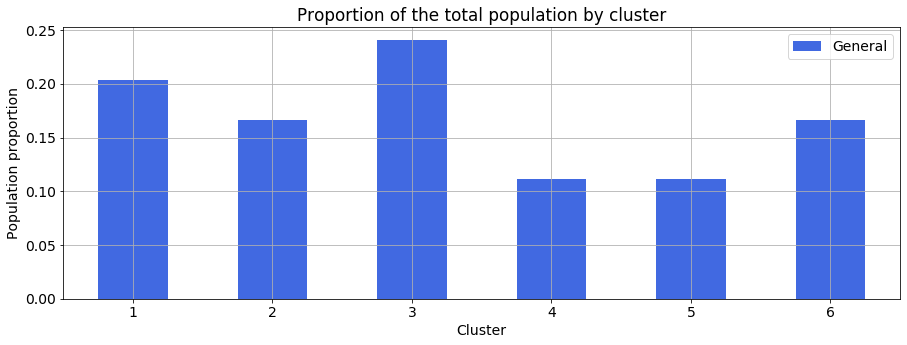

In [16]:
# k-means model with the selected number of clusters
kmeans = KMeans(6, random_state=0)
model = kmeans.fit(dfPCA)
TrendsDF = model.predict(dfPCA)
KmeanProportion(TrendsDF, 6, 'General')

It is important to mention that the found clusters are composed by  continuous sequences of years, as can be seen next:

In [17]:
for cluster in np.unique(TrendsDF):
    print('Years for cluster ' + str(cluster+1) + ':', dfTrends.index.groupby(TrendsDF)[cluster].tolist())

Years for cluster 1: [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003]
Years for cluster 2: [1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]
Years for cluster 3: [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992]
Years for cluster 4: [2013, 2014, 2015, 2016, 2017, 2018]
Years for cluster 5: [1965, 1966, 1967, 1968, 1969, 1970]
Years for cluster 6: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]


<a id='another_cell_three'></a>
# Correlation among clusters and oil prices

This section shows how related are the found clusters with the oil prices among the years that form the different time series. Unfortunately, only years clustered into groups D, E and F are shown, since the dataframe containing the FRED database oil prices history starts in 1987. Then, it is presented first the amount of correlation that exists between the oil prices and the production (Prod) and consumption (Cons) of oil, for each of the mentioned clusters. Next, the oil prices time series are separated accordingly with the continuous sequence of years related to clusters D, E and F, presented by years and by day.

### Importing libraries

In [18]:
#Importing libraries
from FunctionsClustering import CorrePrice, PlotPriceClusters

### Correlation matrix for clusters and oil prices

In [19]:
dfTrends['Cluster'] = TrendsDF.tolist()
dfTrends['Price'] = dfPrice['$ 2018'].loc[dfCons.index.to_list()]
dfTrends, CorrDF = CorrePrice(dfTrends, TrendsDF)
display(CorrDF)

,A (1965-1970),B (1971-1979),C (1980-1992),D (1993-2003),E (2004-2012),F (2013-2018)
0,,,,,,
Angola_Prod,0.881760,0.203359,0.848060,0.455086,0.717584,0.035502
Brazil_Prod,0.883541,0.084880,0.946202,0.606546,0.770267,0.863112
Canada_Prod,0.997447,0.074248,0.805065,0.492969,0.810726,0.524395
China_Prod,0.947339,0.845406,0.924709,0.498493,0.833330,0.443874
Iran_Prod,0.996223,0.438236,0.698508,0.370664,0.061701,0.706965
Iraq_Prod,0.788290,0.919075,0.119540,0.215810,0.802433,0.872784
Kuwait_Prod,0.991037,0.598628,0.361727,0.338947,0.814811,0.345161
Libya_Prod,0.981770,0.431762,0.367417,0.041127,0.477998,0.389422
Mexico_Prod,0.983271,0.870096,0.666016,0.467287,0.725507,0.670452


### Oil prices time series for the clusters of interst

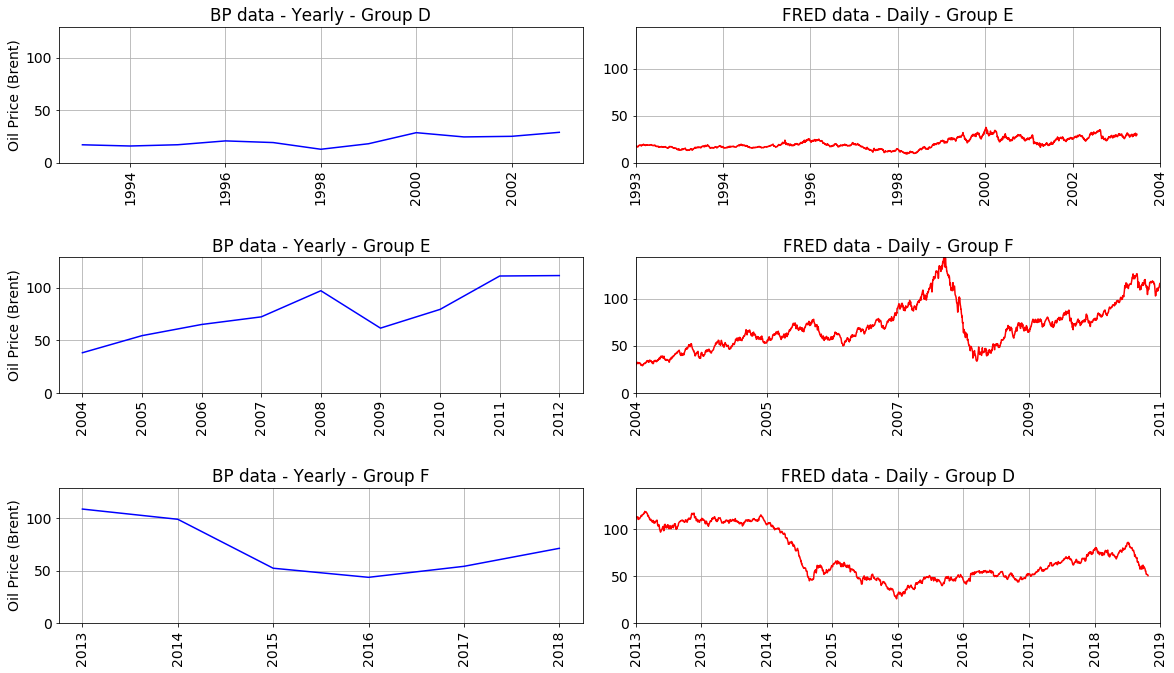

In [20]:
PlotPriceClusters(dfTrends, dfPrice, dfPriceLong)

<a id='another_cell_fourth'></a>
# Forecasting oil prices

This is the section of this project which is used to implement an RNN for the forecasting of future oil prices. This is achieved using the oil prices related to the cluster with more recent years as input to the model, considering that future years will continue its tendency or behaviour. The RNN architecture is designed considering LSTM cells layers, because of its memory property, which helps to the modelling of time series. 

Thus, the time series from the selected cluster is divided into three different datasets, used for the training, validation and testing of the RNN, respectively. It is important to mention that two different RNN are implemented, one with a more robust architecture than the other. This, to have a better understanding of their performances. The mentioned RNN are evaluated using the mean absolute error and the mean squared error, to find differences between the expected oil prices and the predicted using the test dataset.

### Importing libraries

In [21]:
#Importing libraries
from FunctionsTraining import multivariate_data, evaluation, PlottingFprices, data_split_per, plot_train_history
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input, LSTM
from tensorflow.keras.models import Model, Sequential
tf.set_random_seed(0)
CUDA_VISIBLE_DEVICES=1

### Displaying time series to use for the forecasting

In the following figure is shown the time series used to generate the training, validation and testing datasets. 

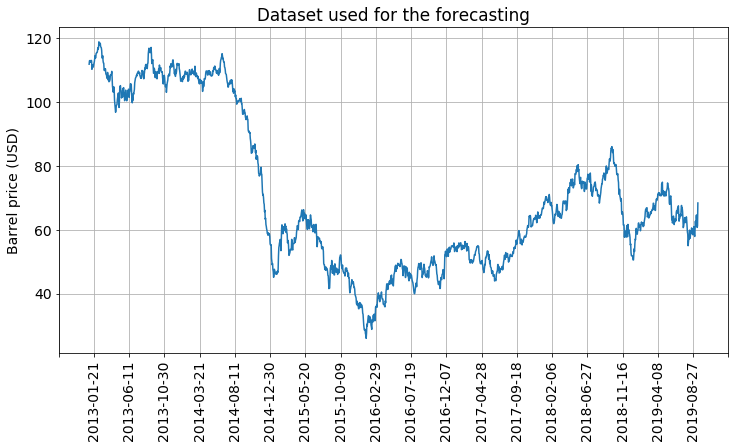

In [22]:
Index0 = dfPriceLong[dfPriceLong.DATE.str.contains(str(dfTrends[dfTrends.Cluster == 'F'].index[0]))].index[0]
dfPriceDS = dfPriceLong.loc[Index0:]

PlottingFprices(dfPriceDS)

### Creating and normalizing the dataframe to use in the RNN model

#### Creating the dataframe

In [23]:
features_considered = ['DCOILBRENTEU']
features = dfPriceDS[features_considered].copy()
features.index = dfPriceDS['DATE']
features.DCOILBRENTEU = features.DCOILBRENTEU.astype(float)
features.head()

,DCOILBRENTEU
DATE,
2013-01-01,111.89
2013-01-02,112.98
2013-01-03,113.03
2013-01-04,112.58
2013-01-07,112.49


#### Scaling the create dataframe and removing the mean and compensanting for the std

In [24]:
Scaler = StandardScaler()
dataset = Scaler.fit_transform(features['DCOILBRENTEU'].values.reshape(-1, 1))

### Defining the Model Hyperparameters

In [25]:
BATCH_SIZE = 256
BUFFER_SIZE = 1000
EVALUATION_INTERVAL = 100
EPOCHS =20
train_per = .6
val_per = .2
test_per = .2
past_history = 240
future_target = 7
STEP = 1

### Defining the training, validation and testing datasets

#### Finding the percentages for each of the desired datasets

In [26]:
train_per, val_per, test_per = data_split_per(features, train_per, val_per, test_per)

TrainLimit = np.floor(dfPriceDS.shape[0] * train_per).astype(int)
ValLimit = np.floor(dfPriceDS.shape[0] * val_per).astype(int)
TestLimit = np.floor(dfPriceDS.shape[0] * test_per).astype(int)

#### Creating the desired datasets

In [27]:
x_train_multi, y_train_multi, train_indexes = multivariate_data(dataset, dataset[:, 0], 0,
                                                 TrainLimit, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi, val_indexes = multivariate_data(dataset, dataset[:, 0],
                                             TrainLimit, TrainLimit+ValLimit, past_history,
                                             future_target, STEP)

x_test_multi, y_test_multi, test_indexes = multivariate_data(dataset, dataset[:, 0],
                                             TrainLimit+ValLimit, dataset.shape[0]-future_target, past_history,
                                             future_target, STEP)

#### Creating tensorflow datasets to use on the RNN

In [29]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

test_data_multi = tf.data.Dataset.from_tensor_slices((x_test_multi, y_test_multi))
test_data_multi = val_data_multi.repeat()

W0930 09:54:43.994820 20176 deprecation.py:323] From C:\Users\alfde\Anaconda3\envs\DeepLearning\lib\site-packages\tensorflow\python\data\util\random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Robust RNN

In this subsection is implemented a complex RNN architecture, a robust RNN, when compared with the following subsection where a less complex RNN is implemented. The section is composed of subsections used to define the architecture of the model, for its training and to measure the performance of the trained model. 

#### Defining the RNN model

In [30]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(128,return_sequences=True,input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(Dropout(.1))

multi_step_model.add(tf.keras.layers.LSTM(128,return_sequences=True))
multi_step_model.add(Dropout(.1))

multi_step_model.add(tf.keras.layers.LSTM(128,return_sequences=True))
multi_step_model.add(Dropout(.1))

multi_step_model.add(tf.keras.layers.LSTM(32, activation='relu'))
multi_step_model.add(Dropout(.2))
multi_step_model.add(tf.keras.layers.Dense(future_target))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

W0930 09:54:44.049674 20176 deprecation.py:506] From C:\Users\alfde\Anaconda3\envs\DeepLearning\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [31]:
multi_step_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 240, 128)          66560     
_________________________________________________________________
dropout (Dropout)            (None, 240, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 240, 128)          131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 240, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 240, 128)          131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 240, 128)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                2

#### Training of the model

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='saved_models/RNNComplexStructure.hdf5', 
                               verbose=1, save_best_only=True)

multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50,callbacks=[checkpointer], verbose=2)

Epoch 1/20

Epoch 00001: val_loss improved from inf to 0.37771, saving model to saved_models/RNNComplexStructure.hdf5
100/100 - 240s - loss: 31.6811 - val_loss: 0.3777
Epoch 2/20

Epoch 00002: val_loss improved from 0.37771 to 0.20330, saving model to saved_models/RNNComplexStructure.hdf5
100/100 - 224s - loss: 0.3058 - val_loss: 0.2033
Epoch 3/20

Epoch 00003: val_loss improved from 0.20330 to 0.18460, saving model to saved_models/RNNComplexStructure.hdf5
100/100 - 239s - loss: 0.2522 - val_loss: 0.1846
Epoch 4/20

Epoch 00004: val_loss improved from 0.18460 to 0.15943, saving model to saved_models/RNNComplexStructure.hdf5
100/100 - 230s - loss: 0.2156 - val_loss: 0.1594
Epoch 5/20

Epoch 00005: val_loss did not improve from 0.15943
100/100 - 223s - loss: 0.1968 - val_loss: 0.1610
Epoch 6/20

Epoch 00006: val_loss improved from 0.15943 to 0.13985, saving model to saved_models/RNNComplexStructure.hdf5
100/100 - 235s - loss: 0.1817 - val_loss: 0.1398
Epoch 7/20

Epoch 00007: val_loss im

- Performance of the trained model, during the training process

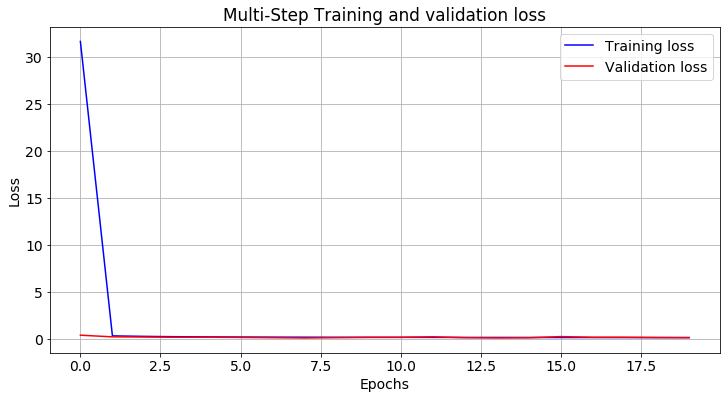

In [37]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

#### Performance of the trained model

The performance of the trained model is measured by comparing the predicted prices against the real prices using the testing dataset, as presented in the following figure.

In [ ]:
iter = test_data_multi.make_one_shot_iterator()
x_test_temp, y_test_temp = iter.get_next()

with tf.Session() as sess:
    x_test, y_test = np.array(sess.run(x_test_temp)), np.array(sess.run(y_test_temp))

test_predict = multi_step_model.predict(x_test)

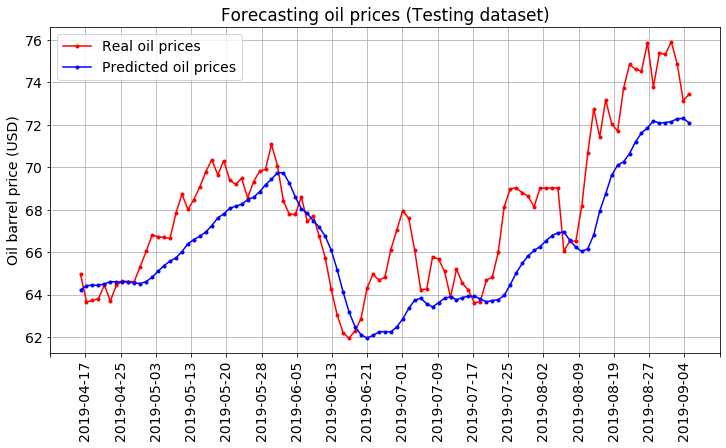

In [39]:
evaluation(y_test, test_predict, features, test_indexes, future_target, Scaler)

Also, the mean absolute error and the mean squared error metrics are used to measure the performance of the trained model, between the predicted values and the expected from the testing dataset:

In [40]:
print('Test Mean Absolute Error:', mean_absolute_error(y_test, test_predict))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, test_predict)))

Test Mean Absolute Error: 0.11308161400237779
Test Root Mean Squared Error: 0.13646978771420828


### Simple RNN 

In this section, a two-layer RNN is used for the forecasting of oil prices. The RNN is implemented to compared results obtained from a more complex RNN implemented in the previous subsection, to compared if the simplest structure can achieve similar results with the benefit of using resources and time for its training. 

#### Defining the structure of the model

In [41]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(128,return_sequences=True,input_shape=x_train_multi.shape[-2:]))

multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))

multi_step_model.add(tf.keras.layers.Dense(future_target))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [42]:
multi_step_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 240, 128)          66560     
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                9280      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 119       
Total params: 75,959
Trainable params: 75,959
Non-trainable params: 0
_________________________________________________________________


#### Training of the model

In [43]:
checkpointer = ModelCheckpoint(filepath='saved_models/RNNSimpleStructure.hdf5', 
                               verbose=1, save_best_only=True)

multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50,callbacks=[checkpointer], verbose=2)

Epoch 1/20

Epoch 00001: val_loss improved from inf to 0.24043, saving model to saved_models/RNNSimpleStructure.hdf5
100/100 - 98s - loss: 17779947.1616 - val_loss: 0.2404
Epoch 2/20

Epoch 00002: val_loss improved from 0.24043 to 0.19998, saving model to saved_models/RNNSimpleStructure.hdf5
100/100 - 101s - loss: 0.3027 - val_loss: 0.2000
Epoch 3/20

Epoch 00003: val_loss did not improve from 0.19998
100/100 - 105s - loss: 0.1981 - val_loss: 0.2277
Epoch 4/20

Epoch 00004: val_loss improved from 0.19998 to 0.17117, saving model to saved_models/RNNSimpleStructure.hdf5
100/100 - 113s - loss: 0.1308 - val_loss: 0.1712
Epoch 5/20

Epoch 00005: val_loss improved from 0.17117 to 0.16192, saving model to saved_models/RNNSimpleStructure.hdf5
100/100 - 113s - loss: 0.1124 - val_loss: 0.1619
Epoch 6/20

Epoch 00006: val_loss did not improve from 0.16192
100/100 - 112s - loss: 0.1000 - val_loss: 0.1683
Epoch 7/20

Epoch 00007: val_loss improved from 0.16192 to 0.15133, saving model to saved_mode

- Performance of the trained model, during the training process

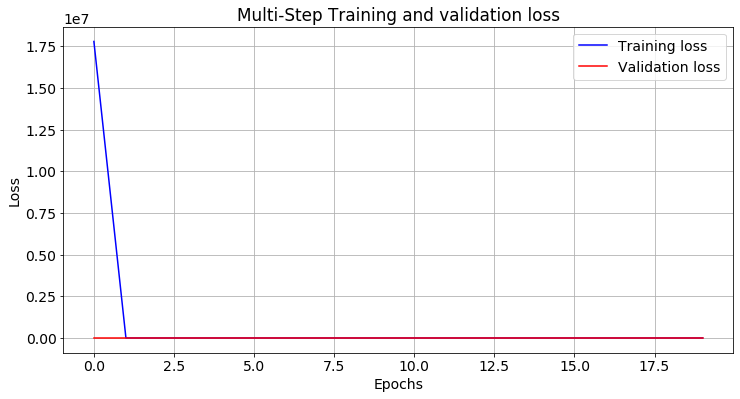

In [44]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

#### Performance of the trained model

The performance of the trained model is measured by comparing the predicted prices against the real prices using the testing dataset, as presented in the following figure.

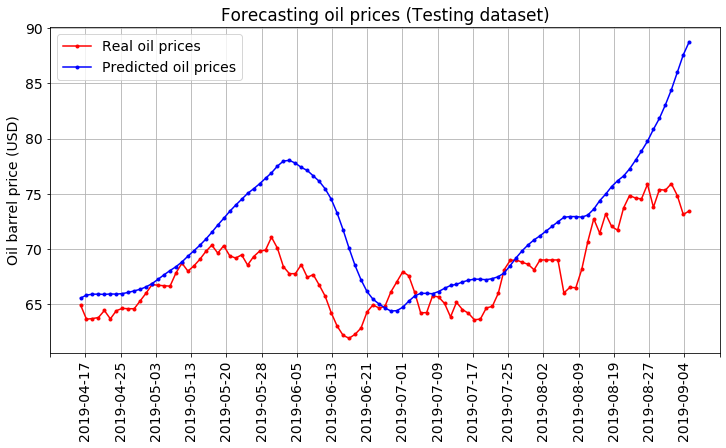

In [47]:
test_predict = multi_step_model.predict(x_test)

evaluation(y_test, test_predict, features, test_indexes, future_target, Scaler)

In addition, the mean absolute error and the mean squared error metrics are used to measure the performance of the trained model, between the predicted values and the expected from the testing dataset.

In [48]:
print('Test Mean Absolute Error:', mean_absolute_error(y_test, test_predict))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, test_predict)))

Test Mean Absolute Error: 0.2012554191291938
Test Root Mean Squared Error: 0.33373897070101705


<a id='another_cell_fifth'></a>
# Conclusion

It was proved in this project how powerful RNNs are for the prediction of oil prices. The implemented RNN showed good performances, presenting better result the most robust network implemented. The simplest network implemented have more differences from the real expected prices. However, both networks follow correctly the behaviour of the time series used to train, to validate and to test the trained RNNs.

For the implementation of the networks, batches of 240 elements size were used, containing the 240 oil prices used to predict prices for the next seven days. The length of the batches used as input to network changes its behaviour, for example, by using longer batches the networks were able to follow longer changes, while when using shorter batches the networks followed better changes occurred in smaller periods.

As a result, it was proved that the trained network can predict correctly oil prices based on the previous 240 historical data of the cost of the oil barrels. More important, it was proven that the selected cluster of data, found using PCA and k-means, can be used to make correct predictions. This means that we are still within the current cycle of the oil industry, no big changes have happened yet. 

<a id='another_cell_last'></a>
# Future work

As proven during this project, the defined and trained RNNs can be used for the prediction of future oil princes correctly. The performance of the networks is enough for good predictions, especially when considering the more complex RNN implemented. 

Nevertheless, its performance can improve, and more importantly, it needs to be implemented an RNN that predict oil prices for a longer period of time. Thus, as future work, it is proposed the implementation of the mentioned network.

The objective of the future work is to find when the next cycle of the oil industry will happen and to be prepared for such an important event.